In [1]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Input, concatenate, add
from keras.layers import Conv2D, MaxPool2D , Flatten, Dropout
from keras.optimizers import SGD, Adam, Adagrad

# Keras dataset
from keras.datasets import mnist

# Keras utils
from keras.utils import np_utils

Using TensorFlow backend.


In [4]:
(x_train0, y_train0), (x_test0, y_test0) = mnist.load_data()

In [5]:
x_train = x_train0.reshape(60000,28,28,1)
x_test = x_test0.reshape(10000,28,28,1)

In [6]:
x_train = x_train/255
x_test = x_test/255

In [7]:
y_train = np_utils.to_categorical(y_train0, 10)
y_test = np_utils.to_categorical(y_test0, 10)

### CNN

In [8]:
model = Sequential()

In [9]:
model.add(Conv2D(10, (5,5), padding='same', input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(30, (5,5), padding='same'))
model.add(Activation('selu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(30))
model.add(Activation('selu'))


model.add(Dense(10))
model.add(Activation('softmax'))

In [10]:
model.compile(loss ='categorical_crossentropy', optimizer = Adagrad(lr = 0.01), metrics = ['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 10)        260       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 10)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 10)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 10)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 30)        7530      
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 30)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 30)          0         
__________

In [11]:
history = model.fit(x_train, y_train, batch_size=100, epochs=10, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 53s 880us/step - loss: 0.1666 - acc: 0.9501 - val_loss: 0.0612 - val_acc: 0.9806
Epoch 2/10
60000/60000 [==============================] - 62s 1ms/step - loss: 0.0748 - acc: 0.9772 - val_loss: 0.0488 - val_acc: 0.9842
Epoch 3/10
60000/60000 [==============================] - 61s 1ms/step - loss: 0.0620 - acc: 0.9808 - val_loss: 0.0423 - val_acc: 0.9861
Epoch 4/10
60000/60000 [==============================] - 60s 998us/step - loss: 0.0537 - acc: 0.9832 - val_loss: 0.0419 - val_acc: 0.9864
Epoch 5/10
60000/60000 [==============================] - 60s 1ms/step - loss: 0.0499 - acc: 0.9843 - val_loss: 0.0374 - val_acc: 0.9882
Epoch 6/10
60000/60000 [==============================] - 60s 1ms/step - loss: 0.0450 - acc: 0.9863 - val_loss: 0.0349 - val_acc: 0.9881
Epoch 7/10
60000/60000 [==============================] - 60s 998us/step - loss: 0.0434 - acc: 0.9868 - val_loss: 0.0355 - v

In [12]:
score = model.evaluate(x_test, y_test)
print("Loss: %f" %score[0])
print("準確率: %f" %(score[1]))

10000/10000 [==============================] - 3s 350us/step
Loss: 0.032504
準確率: 0.988500


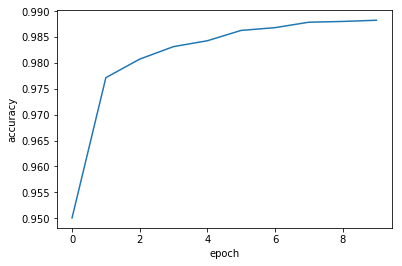

In [13]:
plt.plot(history.history['acc'])
plt.ylabel('accuracy')
plt.xlabel('epoch')